## FOR COMP90024 ASSIGNMENT 2
### BY TEAM 45:
- William Chen 1400081
- Petr Andreev 1375858
- Rafsan Al Mamun 1407776
- Ojaswi Dheer 1447227

In [19]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
with open('../data/historic_tweet_sentiments.json', 'r') as f:
    data = json.load(f)

entries = data['entries']

df = pd.DataFrame(entries)
df


,day,month,total_sentiment,total_tweets,year
0,21,6,11105.178827,206675,2021
1,22,6,11880.141233,219689,2021
2,23,6,12305.217217,224419,2021
3,24,6,11026.589371,210385,2021
4,29,6,13369.864219,246481,2021
...,...,...,...,...,...
335,2,6,16832.835328,284913,2022
336,3,6,16718.695386,278711,2022
337,4,6,4634.843466,74163,2022
338,10,9,-0.285714,1,2021


In [21]:
mean_sentiment_by_month = df.groupby('month')['total_sentiment'].mean().reset_index()

### SCALING IT TO GET A PROPER PLOT WITH BOM DATA
mean_sentiment_by_month['total_sentiment'] = mean_sentiment_by_month['total_sentiment'] / 100
mean_sentiment_by_month = mean_sentiment_by_month.rename(columns={'total_sentiment': 'total_sentiment(scaled)'})

# Map month number to month name
mean_sentiment_by_month['month'] = pd.to_datetime(mean_sentiment_by_month['month'], format='%m').dt.strftime('%B')
mean_sentiment_by_month

,month,total_sentiment(scaled)
0,January,163.199815
1,February,165.369634
2,March,155.137951
3,April,172.094592
4,May,175.378909
5,June,117.902809
6,July,128.665322
7,August,142.226409
8,September,137.521617
9,October,144.126100


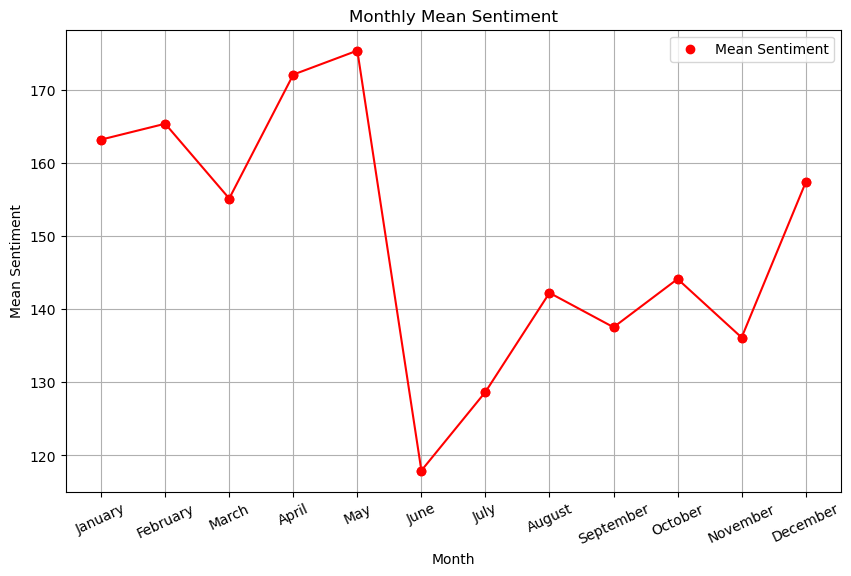

In [22]:
# Plot scatter plot with line
plt.figure(figsize=(10, 6))
plt.scatter(mean_sentiment_by_month['month'], mean_sentiment_by_month['total_sentiment(scaled)'], color='red', label='Mean Sentiment')
plt.plot(mean_sentiment_by_month['month'], mean_sentiment_by_month['total_sentiment(scaled)'], color='red', linestyle='-', marker='o')
plt.title('Monthly Mean Sentiment')
plt.xlabel('Month')
plt.ylabel('Mean Sentiment')
plt.grid(True)
plt.legend()
plt.xticks(rotation=25)
plt.show()

## Sentiment Analysis


In [23]:
def get_rainfall_data(cities):
    # Process data for each city
    city_data_list = []
    for city, file_path in cities.items():
        city_data = process_city_data(file_path)
        city_data_list.append(city_data)

    # Concatenate data for all cities to get a overview of Australia 
    Rainfall_data = pd.concat(city_data_list, ignore_index=True)
    Rainfall_data = Rainfall_data.groupby(['Month'])['Monthly Precipitation Total (millimetres)'].mean().reset_index()
    Rainfall_data['Month'] = pd.to_datetime(Rainfall_data['Month'], format='%m').dt.strftime('%B')

    return Rainfall_data


def get_temp_data(cities):
    # Process data for each city
    city_data_list = []
    for city, file_path in cities.items():
        city_data = process_city_data(file_path)
        city_data_list.append(city_data)

    # Concatenate data for all cities to get a overview of Australia 
    Temperature_data = pd.concat(city_data_list, ignore_index=True)
    Temperature_data = Temperature_data.groupby(['Month'])['Mean maximum temperature (°C)'].mean().reset_index()
    Temperature_data['Month'] = pd.to_datetime(Temperature_data['Month'], format='%m').dt.strftime('%B')

    return Temperature_data


def process_city_data(file_path):
    city_df = pd.read_csv(file_path)

    # Filter rows for years 2021 and 2022
    city_df = city_df[(city_df['Year'] == 2021) | (city_df['Year'] == 2022)]

    # Drop the first and last column
    city_df = city_df.iloc[:, 2:-1]
    
    return city_df



In [24]:
temp_cities = {
        'Adelaide': '../data/bom_historic_data/temperature_cities/Adelaide.csv',
        'Brisbane': '../data/bom_historic_data/temperature_cities/Brisbane.csv',
        'Canberra': '../data/bom_historic_data/temperature_cities/Canberra.csv',
        'Darwin': '../data/bom_historic_data/temperature_cities/Darwin.csv',
        'Melbourne': '../data/bom_historic_data/temperature_cities/Melbourne.csv',
        'Perth': '../data/bom_historic_data/temperature_cities/Perth.csv',
        'Sydney': '../data/bom_historic_data/temperature_cities/Sydney.csv',
        'Tasmania': '../data/bom_historic_data/temperature_cities/Tasmania.csv'
    }

temp_data = get_temp_data(temp_cities)
temp_data

,Month,Mean maximum temperature (°C)
0,January,28.60000
1,February,27.63750
2,March,26.44375
3,April,24.24375
4,May,21.03125
5,June,18.38750
6,July,17.81250
7,August,19.61875
8,September,21.20625
9,October,22.75625


In [25]:
rain_cities = {
        'Adelaide': '../data/bom_historic_data/rainfall_cities/Adelaide.csv',
        'Brisbane': '../data/bom_historic_data/rainfall_cities/Brisbane.csv',
        'Canberra': '../data/bom_historic_data/rainfall_cities/Canberra.csv',
        'Darwin': '../data/bom_historic_data/rainfall_cities/Darwin.csv',
        'Melbourne': '../data/bom_historic_data/rainfall_cities/Melbourne.csv',
        'Perth': '../data/bom_historic_data/rainfall_cities/Perth.csv',
        'Sydney': '../data/bom_historic_data/rainfall_cities/Sydney.csv',
        'Tasmania': '../data/bom_historic_data/rainfall_cities/Tasmania.csv'
    }

rain_data = get_rainfall_data(rain_cities)
rain_data

,Month,Monthly Precipitation Total (millimetres)
0,January,122.826667
1,February,126.706250
2,March,94.825000
3,April,56.312500
4,May,80.253333
5,June,55.312500
6,July,57.426667
7,August,59.575000
8,September,59.831250
9,October,109.506250


In [26]:
# Merge the two dataframes
df_merged = pd.merge(rain_data, temp_data, on=['Month'])

# Rename columns
df_merged.rename(columns={'Monthly Precipitation Total (millimetres)': 'Total Rainfall', 'Mean maximum temperature (°C)': 'Mean Max Temp'}, inplace=True)
df_merged


,Month,Total Rainfall,Mean Max Temp
0,January,122.826667,28.60000
1,February,126.706250,27.63750
2,March,94.825000,26.44375
3,April,56.312500,24.24375
4,May,80.253333,21.03125
5,June,55.312500,18.38750
6,July,57.426667,17.81250
7,August,59.575000,19.61875
8,September,59.831250,21.20625
9,October,109.506250,22.75625


In [27]:
australia_data = pd.merge(df_merged, mean_sentiment_by_month, left_on='Month', right_on='month',)
australia_data.drop('month', axis=1, inplace=True)
australia_data

,Month,Total Rainfall,Mean Max Temp,total_sentiment(scaled)
0,January,122.826667,28.60000,163.199815
1,February,126.706250,27.63750,165.369634
2,March,94.825000,26.44375,155.137951
3,April,56.312500,24.24375,172.094592
4,May,80.253333,21.03125,175.378909
5,June,55.312500,18.38750,117.902809
6,July,57.426667,17.81250,128.665322
7,August,59.575000,19.61875,142.226409
8,September,59.831250,21.20625,137.521617
9,October,109.506250,22.75625,144.126100


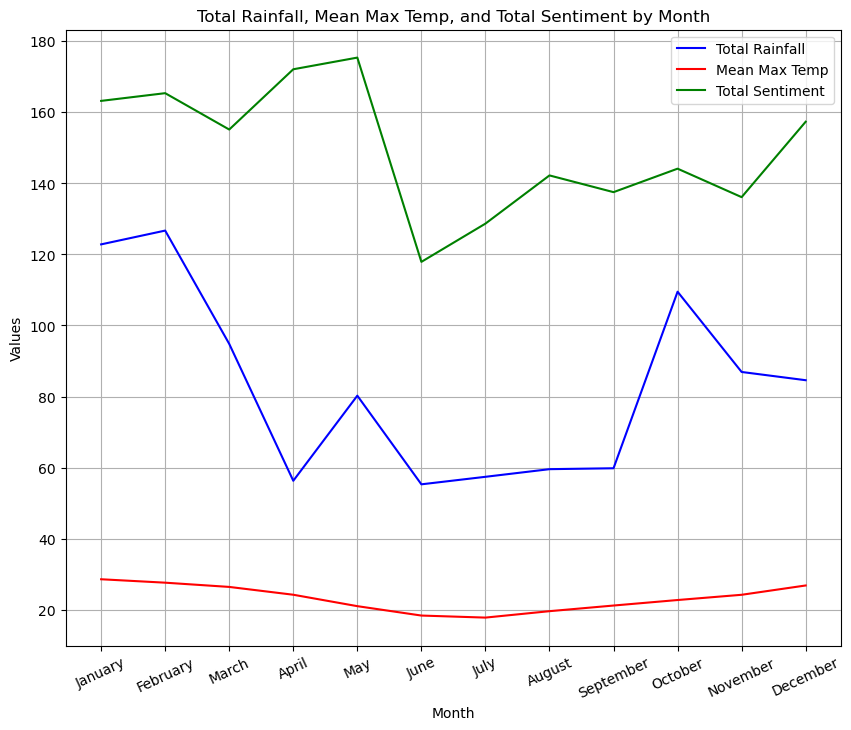

In [28]:
# Line plot
plt.figure(figsize=(10, 8))
plt.plot(australia_data['Month'], australia_data['Total Rainfall'], color='blue', label='Total Rainfall')
plt.plot(australia_data['Month'], australia_data['Mean Max Temp'], color='red', label='Mean Max Temp')
plt.plot(australia_data['Month'], australia_data['total_sentiment(scaled)'], color='green', label='Total Sentiment')
plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Total Rainfall, Mean Max Temp, and Total Sentiment by Month')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=25)
plt.show()

In [29]:
correlation_rainfall = australia_data['total_sentiment(scaled)'].corr(australia_data['Total Rainfall'])
correlation_temp = australia_data['total_sentiment(scaled)'].corr(australia_data['Mean Max Temp'])
correlation_temp_rain = australia_data['Total Rainfall'].corr(australia_data['Mean Max Temp'])

print("Correlation between Total Rainfall and Mean Max Temp:", correlation_temp_rain)
print("Correlation between Total Sentiment and Total Rainfall:", correlation_rainfall)
print("Correlation between Total Sentiment and Mean Max Temp:", correlation_temp)


Correlation between Total Rainfall and Mean Max Temp: 0.7767054124462672
Correlation between Total Sentiment and Total Rainfall: 0.44432392915817553
Correlation between Total Sentiment and Mean Max Temp: 0.6352098169581456


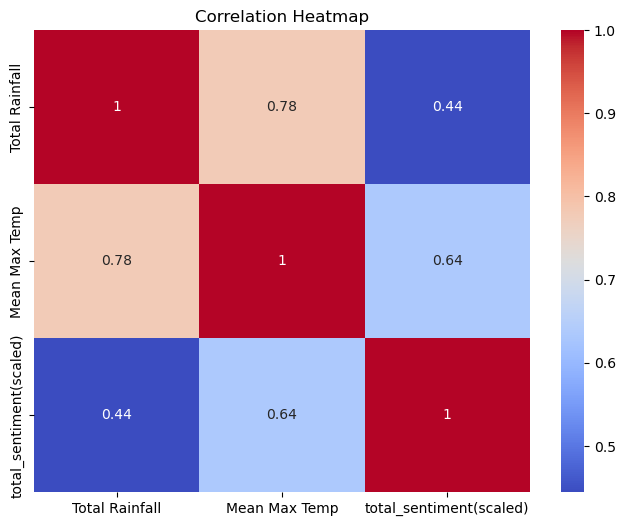

In [30]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(australia_data.drop(columns='Month').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


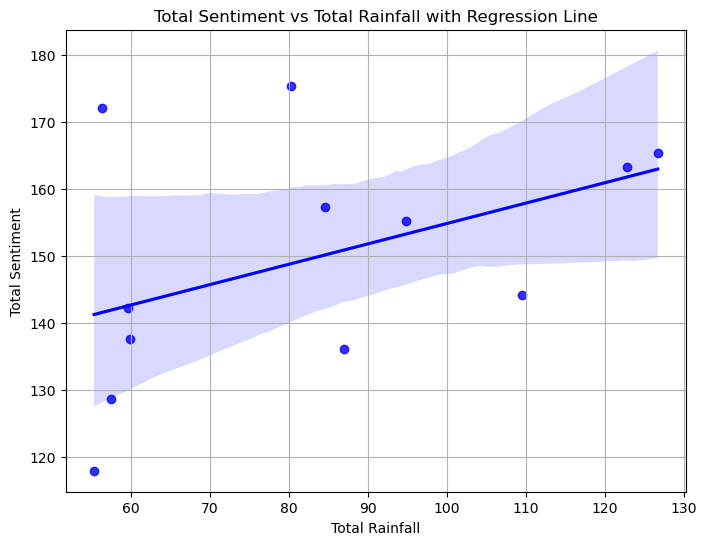

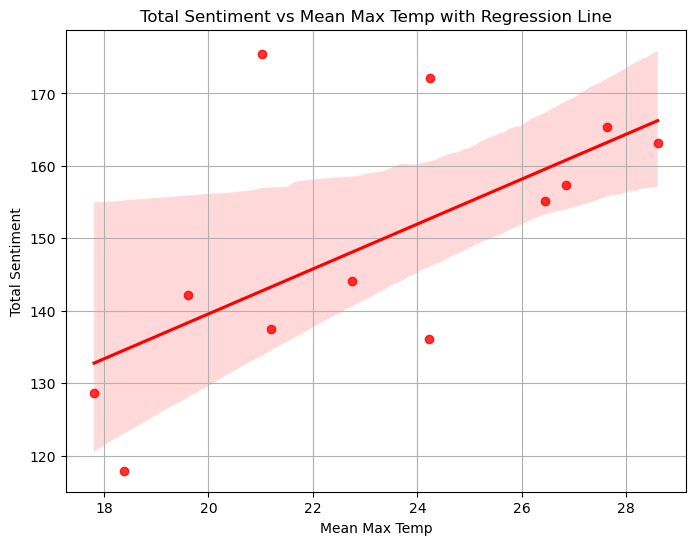

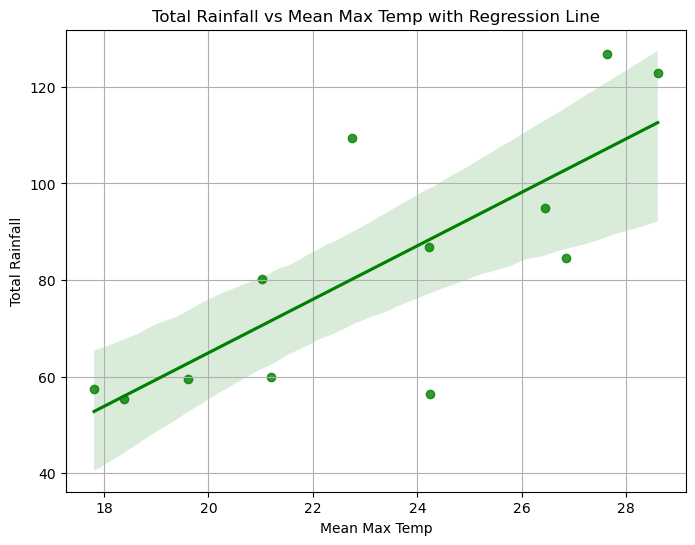

In [31]:
import seaborn as sns

# Scatter plot with regression line for Total Sentiment vs Mean Rainfall
plt.figure(figsize=(8, 6))
sns.regplot(x='Total Rainfall', y='total_sentiment(scaled)', data=australia_data, color='blue')
plt.xlabel('Total Rainfall')
plt.ylabel('Total Sentiment')
plt.title('Total Sentiment vs Total Rainfall with Regression Line')
plt.grid(True)
plt.show()

# Scatter plot with regression line for Total Sentiment vs Mean Max Temp
plt.figure(figsize=(8, 6))
sns.regplot(x='Mean Max Temp', y='total_sentiment(scaled)', data=australia_data, color='red')
plt.xlabel('Mean Max Temp')
plt.ylabel('Total Sentiment')
plt.title('Total Sentiment vs Mean Max Temp with Regression Line')
plt.grid(True)
plt.show()


# Scatter plot with regression line for Total Sentiment vs Mean Max Temp
plt.figure(figsize=(8, 6))
sns.regplot(x='Mean Max Temp', y='Total Rainfall', data=australia_data, color='green')
plt.xlabel('Mean Max Temp')
plt.ylabel('Total Rainfall')
plt.title('Total Rainfall vs Mean Max Temp with Regression Line')
plt.grid(True)
plt.show()
